# DT Assignment1_투빅스 14기 이혜린

# Data Loading

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings(action='ignore')

In [2]:
pd_data = pd.read_csv('https://raw.githubusercontent.com/AugustLONG/ML01/master/01decisiontree/AllElectronics.csv')
pd_data.drop("RID",axis=1, inplace = True) #RID는 그냥 순서라서 삭제
pd_data

,age,income,student,credit_rating,class_buys_computer
0,youth,high,no,fair,no
1,youth,high,no,excellent,no
2,middle_aged,high,no,fair,yes
3,senior,medium,no,fair,yes
4,senior,low,yes,fair,yes
5,senior,low,yes,excellent,no
6,middle_aged,low,yes,excellent,yes
7,youth,medium,no,fair,no
8,youth,low,yes,fair,yes
9,senior,medium,yes,fair,yes


In [3]:
a = list(pd_data['age'].unique())
a

['youth', 'middle_aged', 'senior']

In [4]:
unique=[]
for i in range(len(a)):
    unique.append(a[i])
unique

['youth', 'middle_aged', 'senior']

# 1. Gini 계수를 구하는 함수 만들기

- Input: df(데이터), label(타겟변수명)
- 해당 결과는 아래와 같이 나와야 합니다.

In [5]:
def get_gini(df, label): # label 일때만 가능
    
    gini = 1 - (sum(df[label]=='yes') / len(df))**2 - (sum(df[label]=='no') / len(df)) **2
    
    return gini

In [6]:
def get_gini2(df, label): # label이 아닌 다른 feature에 대해서도 가능 (그냥 만들어봤어용...ㅎㅎ)
    
    uni = []
    a = list(df[label].unique())
    p=0
    for i in range(len(a)):
        uni.append(a[i])
    for j in range(len(a)):
        p += (sum(df[label]==uni[j]) / len(df[label]))**2
    
    gini = 1 - p
    
    return gini    

In [7]:
get_gini(pd_data, 'class_buys_computer')

0.4591836734693877

In [8]:
get_gini2(pd_data, 'class_buys_computer')

0.4591836734693877

# 2. Feature의 Class를 이진 분류로 만들기
 ## ex) {A,B,C} -> ({A}, {B,C}), ({B}, {A,C}), ({C}, {A,B})

- Input: df(데이터), attribute(Gini index를 구하고자 하는 변수명)
- 해당 결과는 아래와 같이 나와야 합니다.

In [9]:
def get_binary_split(df, attribute):
    
    uni = list(pd_data[attribute].unique()) # range에 사용하기 위해 정의
    result = []
    
    for i in range(len(uni)):
        uni = list(pd_data[attribute].unique()) # 매 반복마다 초기화
        result.append([uni[i]]) # 특성 한개인 list 추가
        del uni[i] # append한 값 삭제
        result.append(uni) # 특성 두개인 list 추가
        
    return result

In [10]:
get_binary_split(pd_data,"age")

[['youth'],
 ['middle_aged', 'senior'],
 ['middle_aged'],
 ['youth', 'senior'],
 ['senior'],
 ['youth', 'middle_aged']]

# 3. 다음은 모든 이진분류의 경우의 Gini index를 구하는 함수 만들기
- 위에서 완성한 두 함수를 사용하여 만들어주세요!
- 해당 결과는 아래와 같이 나와야 합니다.

In [11]:
def get_attribute_gini_index(df, attribute, label):
    
    a_list = get_binary_split(df,attribute)
    result={}
    
    for i in range(len(a_list)):
        if len(a_list[i])==1:
            df_true = df[df[attribute] == a_list[i][0]] # attribute = 속성값 을 만족하는 df_true 생성
            df_false = df[df[attribute] != a_list[i][0]] # attribute = 속성값 을 만족하지 않는 df_false 생성
            gini = len(df_true) / len(df) * get_gini(df_true,label) + (1 - len(df_true) / len(df)) * get_gini(df_false,label)
            result[a_list[i][0]] = gini

    return result

In [12]:
get_attribute_gini_index(pd_data, "age", "class_buys_computer")

{'youth': 0.3936507936507936,
 'middle_aged': 0.35714285714285715,
 'senior': 0.45714285714285713}

여기서 가장 작은 Gini index값을 가지는 class를 기준으로 split해야겠죠?

In [13]:
min(get_attribute_gini_index(pd_data, "age", "class_buys_computer").items())

('middle_aged', 0.35714285714285715)

`middle_aged`와 `youth, senior`를 기준으로 분류한다.  
그 후, age != middle_aged를 가지고 나머지 특성에 대해 gini index를 계산하고 분류한다.

# 다음의 문제를 위에서 작성한 함수를 통해 구한 값으로 보여주세요!
## 문제1) 변수 ‘income’의 이진분류 결과를 보여주세요.

## 문제2) 분류를 하는 데 가장 중요한 변수를 선정하고, 해당 변수의 Gini index를 제시해주세요.

## 문제3) 문제 2에서 제시한 feature로 DataFrame을 split한 후 나눠진 2개의 DataFrame에서 각각   다음으로 중요한 변수를 선정하고 해당 변수의 Gini index를 제시해주세요.

In [14]:
##문제1 답안
get_binary_split(pd_data,"income")

[['high'],
 ['medium', 'low'],
 ['medium'],
 ['high', 'low'],
 ['low'],
 ['high', 'medium']]

In [15]:
##문제2 답안
min(get_attribute_gini_index(pd_data, "age", "class_buys_computer").items())

('middle_aged', 0.35714285714285715)

In [16]:
min(get_attribute_gini_index(pd_data, "income", "class_buys_computer").items())

('high', 0.4428571428571429)

In [17]:
min(get_attribute_gini_index(pd_data, "student", "class_buys_computer").items())

('no', 0.3673469387755103)

In [18]:
min(get_attribute_gini_index(pd_data, "credit_rating", "class_buys_computer").items())

('excellent', 0.42857142857142855)

가장 중요한 feature는 `age`이다.  
데이터를 `middle_aged`와 `youth, senior`를 기준으로 나눈다. 이 때 지니계수의 값은 다음과 같다.  
$ Gini_{age = middle_aged} = 0.3571$ 

In [19]:
##문제3 답안

new_data = pd_data[pd_data['age']!='middle_aged']
new_data

,age,income,student,credit_rating,class_buys_computer
0,youth,high,no,fair,no
1,youth,high,no,excellent,no
3,senior,medium,no,fair,yes
4,senior,low,yes,fair,yes
5,senior,low,yes,excellent,no
7,youth,medium,no,fair,no
8,youth,low,yes,fair,yes
9,senior,medium,yes,fair,yes
10,youth,medium,yes,excellent,yes
13,senior,medium,no,excellent,no


In [20]:
min(get_attribute_gini_index(new_data, "income", "class_buys_computer").items())

('high', 0.375)

In [21]:
min(get_attribute_gini_index(new_data, "student", "class_buys_computer").items())

('no', 0.31999999999999984)

In [22]:
min(get_attribute_gini_index(new_data, "credit_rating", "class_buys_computer").items())

('excellent', 0.4166666666666667)

지니계수가 가장 낮은 feature는 `student`이다. `student`의 값은 `yes` 와 `no` 뿐이므로 `no`와 `yes`로 분류한다.  
이 때 지니계수의 값은 다음과 같다.  
$ Gini_{student = no} = 0.32$ 

## + scikit-learn을 이용한 Decision Tree (Gini Index) 실습

In [23]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

In [24]:
x = pd_data.drop(['class_buys_computer'], axis=1)
y = pd_data['class_buys_computer']

In [25]:
# 범주형 변수를 숫자형 변수로 전환 

encoder = LabelEncoder()
X_train = pd.DataFrame(np.zeros((x.shape[0],x.shape[1])))

for i in range(x.shape[1]):
    encoder.fit(x.iloc[:,i])
    X_train.iloc[:,i] = encoder.transform(x.iloc[:,i])

In [26]:
X_train.columns = ['age', 'income', 'student', 'credit_rating']
X_train 

,age,income,student,credit_rating
0,2,0,0,1
1,2,0,0,0
2,0,0,0,1
3,1,2,0,1
4,1,1,1,1
5,1,1,1,0
6,0,1,1,0
7,2,2,0,1
8,2,1,1,1
9,1,2,1,1


In [27]:
y_train = pd.get_dummies(y, drop_first=True)
y_train.columns = ['class_buys_computer']
y_train # 0 : no, 1: yes

,class_buys_computer
0,0
1,0
2,1
3,1
4,1
5,0
6,1
7,0
8,1
9,1


Variable | Explanation
:-:|:-
age | 0 : middled_age, 1 : senior, 2 : youth
income | 0 : high, 1 : low, 2 : medium
student | 0 : no, 1 : yes
credit_rating | excellent : 0, fair : 1
class_buys_computer | 0 : no, 1 : yes

In [28]:
dt_model_gini = DecisionTreeClassifier(criterion='gini') # gini index를 사용한 decision tree

In [29]:
dt_model_gini.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [30]:
X_new = [[1, 0, 0, 0]] # age = senior, income=high, student=no, credit_rating=excellent

In [31]:
dt_model_gini.predict(X_new)

array([0], dtype=uint8)

age=senior, income=high, student=no, credit_rating=excellent인 사람은 computer를 사지 않는다.

###  Decision Tree 시각화

[]

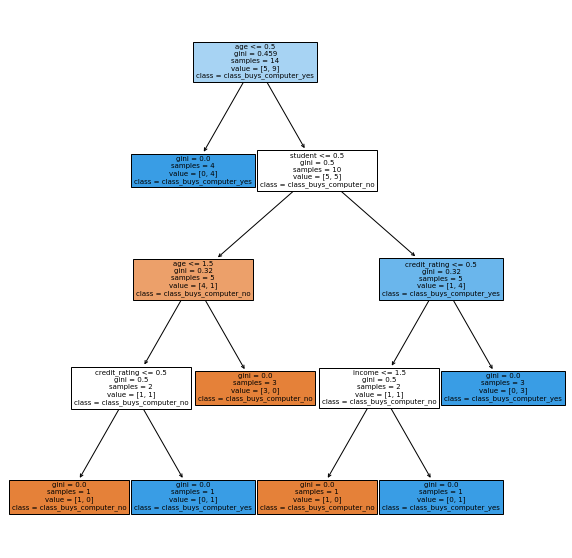

In [32]:
from sklearn import tree

fn=['age', 'income', 'student', 'credit_rating']
cn=['class_buys_computer_no', 'class_buys_computer_yes']

plt.figure(figsize=(10,10))
tree.plot_tree(dt_model_gini, feature_names=fn, class_names=cn, filled=True)
plt.plot()